In [1]:
## k-voisins.py
## Introduction à Python
## Squelette du code recherche des k plus proches voisins
## (c) Eric Gouardères, novembre 2019

import numpy as np
import matplotlib.pyplot as plt
import random as rd
from math import sqrt
import sys
from scipy.spatial import distance
import timeit 
from numba import jit
import numba
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
iris = datasets.load_iris()
def sklearn_to_df(sklearn_dataset):
# Création dataFrame, colonnes caractéristiques (valeurs et étiquettes)
    df = pd.DataFrame(data=sklearn_dataset.data, columns=sklearn_dataset.feature_names)
# Ajout colonne variable à estimer
    df['target'] = sklearn_dataset.target
    return df
# Chargement du jeu de données et création d'une structure DataFrame Pandas
df = sklearn_to_df(iris)

#print(df)

In [3]:
"""Distance euclidienne entre deux points (espace à deux dimensions)

    Un point est représenté par un couple de valeurs flottantes.
    """
#1ere methode
def dist (a,b):
    x=a[0]-b[0]
    y=a[1]-b[1]
    return sqrt(x**2+y**2)

# 2eme methode
def dist1 (a,b):
    return distance.euclidean([a[0],a[1],0], [b[0],b[1],0])

# 3eme methode     
from numba import jit 
@jit(nopython=True)
def dist2 (a,b):
    x=a[0]-b[0]
    y=a[1]-b[1]
    return sqrt(x**2+y**2)


#4eme methode
def distMulti (a,b):
    somme=0
    for i in range(len(b)):
        diff=(a[i]-b[i])**2
        somme+=diff
    
    return sqrt(somme)


a=[6,2,3,4,5]
c=[1,2,13,9,2]
b=[3,1]

#distMulti(a,c)
#%timeit dist2(c,b)
#%timeit dist(a,a)

In [4]:
 """Affichage en deux dimensions : d'un point x, et d'un nuage de points à partir d'une liste a de n points.

    Un point est représenté par un couple de valeurs flottantes.
    x et ses voisins sont en bleu, les autres points sont en gris.
    Exemple d'utilisation de la librairie matplotlib.
    
    """

def affiche(x, a, n , k_voisins ):
    
    def couleur(a,b):
        c=[]
        for i in range(len(a[0])):
            
            if a[0][i] in b[0]:
                c.append('gray')
                ind=b[0].index(a[0][i])
                if a[1][i]==b[1][ind]:
                    cnkv
            elif a[0][i] in a[0][lab==0]:
                c.append('g')
            elif a[0][i] in a[0][lab==1]:
                c.append('r')
            else: 
                c.append('b')
        return c
    
    # Création des deux tableaux (axe x et y) pour affichage des points de k_voisins (tableaux numpy)
    x1=[]
    y1=[]
    for i in k_voisins:
        x1.append(i[0])
        y1.append(i[1])
    b=(x1,y1)
    plt.scatter(a[0],a[1],s=25,c=couleur(a,b))
    plt.scatter(x[0],x[1],s=25,c='magenta')
    
    # Affichage
    #plt.show()
    
def affiche1(x, a, n , k_voisins, predic ):

    #e = input('un espace vectoriel:')
    #s = input('taille des points:')
    # Création des deux tableaux (axe x et y) pour affichage des points de a (tableaux numpy)
    x2=a[0]
    y2=a[1]

    # Création des deux tableaux (axe x et y) pour affichage des points de k_voisins (tableaux numpy)
    x1=[]
    y1=[]
    for i in k_voisins:
        x1.append(i[0])
        y1.append(i[1])
    
    # Initialisation des propriétés de l'affichage
    plt.scatter(x2[lab==0],y2[lab==0],c='g')
    plt.scatter(x2[lab==1],y2[lab==1],c='r')
    plt.scatter(x2[lab==2],y2[lab==2],c='b')
    #plt.scatter(x2,y2,s=25,c=couleur(x2,y2,x1,y1))
    plt.scatter(x1,y1,s=25,c='gray')
    plt.scatter(x[0],x[1],s=25,c='magenta')
    # Affichage
    
    #Affichage résultats
    txt="Résultat : "
    if predic==0:
      txt=txt+"setosa"
    if predic==1:
      txt=txt+"virginica"
    if predic==2:
      txt=txt+"versicolor"
    #plt.text(3,0.5, f"largeur : {round(x[0],2)} cm longueur : {round(x[1],2)} cm", fontsize=12)
    plt.text(3,0.3, f"k : {k}", fontsize=12)
    plt.text(3,0.1, txt, fontsize=12)
    #fin affichage résultats
    
    
    #plt.show()

In [5]:
def affiche2(x, a, k):
    
    x2=a[0]
    y2=a[1]
  
    #graphique
    plt.scatter(x2[lab==0],y2[lab==0], color='g')
    plt.scatter(x2[lab==1],y2[lab==1], color='r')
    plt.scatter(x2[lab==2],y2[lab==2], color='b')
    plt.scatter(x[0],x[1], color='k')
    #plt.legend()
    #fin graphique

    #algo knn
    d=list(zip(x2,y2))
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(d,lab)
    prediction= model.predict([[x[0],x[1]]])
    #fin algo knn

    #Affichage résultats
    txt="Résultat : "
    if prediction[0]==0:
      txt=txt+"setosa"
    if prediction[0]==1:
      txt=txt+"virginica"
    if prediction[0]==2:
      txt=txt+"versicolor"
    plt.text(3,0.5, f"largeur : {round(x[0],2)} cm longueur : {round(x[1],2)} cm", fontsize=12)
    plt.text(3,0.3, f"k : {k}", fontsize=12)
    plt.text(3,0.1, txt, fontsize=12)
    #fin affichage résultats

    #plt.show()

In [6]:
 """Recherche des k plus proches voisins d'un point x, dans une collection a de n éléments.

    a est une liste.
    n et k sont des entiers tels que : 1 <= k < n.
    On considère que chaque élément représente un point d'un espace euclidien à deux dimensions.
    Un point est représenté par un couple de valeurs flottantes.

    """
def cherche_k_voisins(k, x, a, n):
    # pour i allant de 1 à k
    #     mettre le point A[i] dans proches_voisins
    # fin pour
    ... # attention début à 0  
    A=[]
    for i in range(len(a[0])):
        p=(a[0][i],a[1][i])
        A.append(p)     
    proches_voisins=[]
    for i in range(0,k):
        proches_voisins.append(A[i])
    
    #flat_list_generator = itertools.chain(*A)
    #proches_voisins=list(map(int,flat_list_generator ))
    #print(proches_voisins)
    #proches_voisins=[int(i) for i in itertools.chain(A)]
    #print(proches_voisins)
    #proches_voisins=[int(i) for i in reduce(operator.iadd, (list(y) for y in A), [])]
    #print(proches_voisins)
    
# pour i allant de k+1 à n
#     si la distance entre A[i] et x est inférieure à la distance d'un des points de proches_voisins à x
#         supprimer de proches_voisins le point le plus éloigné de x
#         mettre dans proches_voisins le point A[i]
#     fin si
# fin pour    
    
    for i in range(k,n): 
        for j in proches_voisins:
            if distMulti(A[i],x)<distMulti(j,x):
                dis=[]
                for l in proches_voisins:
                    dis.append(distMulti(l,x))
                proches_voisins.remove(proches_voisins[dis.index(max(dis))])
                proches_voisins.append(A[i])
                break
                
# proches_voisins contient les k plus proches voisins de x, le résultat est retourné 
    return (proches_voisins)

def cherche_k_voisins1(k, x, a, n):
    A=[]
    for i in range(n):
        p=(a[0][i],a[1][i])
        A.append(p)   
    
    proches_voisins=[]
    for i in range(0,k):
        proches_voisins.append(A[i])
    
    for i in range(k,n): 
        for j in proches_voisins:
            if distMulti(A[i],x)<distMulti(j,x):
                dis=list(map(lambda l:distMulti(l,x),proches_voisins))
                proches_voisins.remove(proches_voisins[dis.index(max(dis))])
                proches_voisins.append(A[i])
                break
           
    return (proches_voisins)

def cherche_k_voisins2(k, x, a, n):
    A=[]
    for i in range(len(a[0])):
        p=(a[0][i],a[1][i])
        A.append(p)     
    proches_voisins=[]
    for i in range(0,k):
        proches_voisins.append(A[i])
        
    for i in range(k,n): 
        for j in proches_voisins:
            if distMulti(A[i],x)<distMulti(j,x):
                dis=[]
                for l in proches_voisins:
                    dis.append(distMulti(l,x))
                proches_voisins.remove(proches_voisins[dis.index(max(dis))])
                proches_voisins.append(A[i])
                break

    return (proches_voisins)

def cherche_k_voisins3(k, x, a): 
    A=list(zip(a[0],a[1]))
    dis=list(map(lambda l:distMulti(l,x),A))
    dicts=dict(zip(zip(range(0,len(dis)),dis),A))
    proches_voisins=[]
    p=0
    for j in sorted(dicts.keys(), key = lambda x : x[1]):
        proches_voisins.append(dicts[j])
        p+=1
        if p==k:
            break

    return (proches_voisins)

def cherche_k_voisins4(k, x, a, n): 
    A=list(zip(a[0],a[1]))
    dis=list(map(lambda l:distMulti(l,x),A))
    dicts=dict(zip(zip(range(0,len(dis)),dis),A))
    
    proches_voisins=[]
    for j in sorted(dicts.keys(), key = lambda x : x[1]):
        proches_voisins.append(dicts[j])
        
    del proches_voisins[k:n]

    return (proches_voisins)

def cherche_k_voisins5(k, x, a, n): 
    A=list(zip(a[0],a[1]))
    dis=list(map(lambda l:distMulti(l,x),A))
    dicts=dict(zip(zip(range(0,len(dis)),dis),A))

    proches_voisins=[]
    for j in sorted(dicts.keys(), key = lambda x : x[1]):
        proches_voisins.append(dicts[j])

    return (proches_voisins[0:k])

def cherche_k_voisins6(k, x, a, n): 

    A=list(zip(a[0],a[1]))
    dis=list(map(lambda l:dist(l,x),A))
    dicts=dict(zip(zip(range(0,len(dis)),lab.values,dis),A))
    proches_voisins=[]
    p=0
    for j in sorted(dicts.keys(), key = lambda x : x[2]):
        proches_voisins.append(dicts[j])
        p+=1
        if p==k:
            break

    seto=0
    virg=0
    virs=0
    r=list(dicts.keys())
    for i in proches_voisins:
        for j in dicts.values():
            if i==j :
                l=list(dicts.values())
                ind=l.index(j)
                if r[ind][1]==0:
                    seto+=1
                if r[ind][1]==1:
                    virg+=1
                if r[ind][1]==2:
                    virs+=1
                break
                
    if max(seto,virg,virs)==seto:
        predic=0
    elif max(seto,virg,virs)==virg:
        predic=1
    else:
        predic=2
    return(proches_voisins,predic)

le point x( 1.327 , 1.141 )


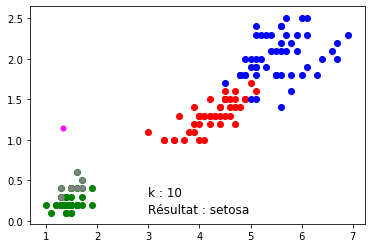

In [198]:
# Programme principal

# Création des données

x1=df.loc[:,"petal length (cm)"]
y1=df.loc[:,"petal width (cm)"]
lab=df.loc[:,"target"]
n =len(iris.data)
a = (x1,y1)
x = (7*np.random.uniform()+1,2.5*np.random.uniform()+1)
k =10 #round(float(input('le nombre des voisin "k":')))

#recherche des k plus proches voisins de x dans a
if k<n and k>=1:
    k_voisins, predict=cherche_k_voisins6(k, x, a, n)
else: 
    sys.exit('à choisir k<n')
    
#affichage des k plus proches voisins 
print('le point x(',round(x[0],3),',',round(x[1],3),')')
#affiche(x, a, n, k_voisins)
affiche1(x, a, n, k_voisins, predict)

In [7]:
x1=df.loc[:,"petal length (cm)"]
y1=df.loc[:,"petal width (cm)"]
lab=df.loc[:,"target"]
n =len(x1)# round(float(input('Donnée le nombre total:')))
#x1=np.random.rand(n,1)
#y1=np.random.rand(n,1)
#x1=df.loc[:,"petal length (cm)"]
#y1=df.loc[:,"petal width (cm)"]
a = (x1,y1)
#a = (x1,y1)
x = (7*np.random.uniform()+1,2.5*np.random.uniform()+1)
k =10# round(float(input('le nombre des voisin "k":')))
ckv3=cherche_k_voisins3(k, x, a)
ckv4=cherche_k_voisins4(k, x, a, n)
ckv5=(cherche_k_voisins5(k, x, a, n))
ckv6,predict=cherche_k_voisins6(k, x, a, n)

In [16]:
X = iris.data[:, :]
xy_train, xy_test, lab_train, lab_test = train_test_split(X, lab,stratify=lab, test_size=0.2, random_state=0)

#scaler = preprocessing.StandardScaler().fit(xy_train)
#xy_train = scaler.transform(xy_train)
#xy_test = scaler.transform(xy_test)
#algo knn
#d=list(zip(x2,y2))
model = KNeighborsClassifier(n_neighbors=120)
#model.fit(d,lab)
model.fit(xy_train, lab_train)
#prediction= model.predict([[x[0],x[1]]])
prediction= model.predict(xy_test)

#print(prediction)
#fin algo knn

# Calcul précision (mean accuracy)
model.score(xy_test, lab_test)*100
#print(accuracy_score(y_test, y_pred))
#print(classification_report(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred))

33.33333333333333

In [47]:
X = iris.data[:, :]
xy_train, xy_ttest, lab_train, lab_test = train_test_split(X, lab,stratify=lab, test_size=0.2, random_state=0)
x1=df.loc[:,"petal length (cm)"]
y1=df.loc[:,"petal width (cm)"]
lab=df.loc[:,"target"]

x5=(x1[19],y1[19])
right=0
fault=0
predictio=[]
k=2
for i in range(k):
    ckv7,predicti=cherche_k_voisins6(i, x5, a, n)
    predictio.append(predicti)
    if predicti==lab[19]:
        right+=1
    else:
        fault+=1
print((right/(k))*100)
#print(predictio)
#affiche1(x5, a, n, ckv7, predicti)

1
50.0


In [ ]:
X = iris.data[:, :]
xy_train, xy_ttest, lab_train, lab_test = train_test_split(X, lab,stratify=lab, test_size=0.2, random_state=0)
x1=df.loc[:,"petal length (cm)"]
y1=df.loc[:,"petal width (cm)"]
lab=df.loc[:,"target"]

x5=(x1[19],y1[19])
right=0
fault=0
predictio=[]
k=150
for i in range(k):
    ckv7,predicti=cherche_k_voisins6(i, x5, a, n)
    #print(predicti)
    predictio.append(predicti)
    if predicti==lab[19]:
        right+=1
    else:
        fault+=1
        
print(predictio,(right/k)*100)
#print(predictio)
#affiche1(x5, a, n, ckv7, predicti)
#print(lab_test)
#score=[]
#for i in predictio:
#        if i==lab_test[i] and i==0:
#            score.append(1)
#        else:
#            score.append(min(i,lab_test[i])/max(i,lab_test[i]))
#print(score)
#scaler = preprocessing.StandardScaler().fit(xy_train)
#xy_train = scaler.transform(xy_train)
#xy_test = scaler.transform(xy_test)
#algo knn
#d=list(zip(x2,y2))
#model = KNeighborsClassifier(n_neighbors=120)
#model.fit(d,lab)
#model.fit(xy_train, lab_train)
#prediction= model.predict([[x[0],x[1]]])
#prediction= model.predict(xy_test)

#print(prediction)
#fin algo knn

# Calcul précision (mean accuracy)
#model.score(xy_test, lab_test)
#print(accuracy_score(y_test, y_pred))
#print(classification_report(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred))

In [ ]:
iris = datasets.load_iris() 
X, y = iris.data[:, :], iris.target
Xtrain, Xtest, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 0, train_size = 0.7)

scaler = preprocessing.StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtrain, y_train)
y_pred = knn.predict(Xtest)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [ ]:
affiche1(x, a, n, ckv5, predict)

In [187]:
A=list(zip(a[0],a[1]))
dis=list(map(lambda l:dist(l,x),A))
dicts=dict(zip(zip(range(0,len(dis)),lab.values,dis),A))
proches_voisins=[]
p=0
for j in sorted(dicts.keys(), key = lambda x : x[2]):
    proches_voisins.append(dicts[j])
    p+=1
    if p==10:
        break
seto=0
virg=0
virs=0
r=list(dicts.keys())
for i in proches_voisins:
    for j in dicts.values():
        if i==j :
            l=list(dicts.values())
            ind=l.index(j)
            print(j,r[ind][1])
            if r[ind][1]==0:
                seto+=1
            if r[ind][1]==1:
                virg+=1
            if r[ind][1]==2:
                virs+=1
            break
if max(seto,virg,virs)==seto:
    predic=0
    print(predic)
elif max(seto,virg,virs)==virg:
    predic=1
    print(predic)
else:
    predic=2
    print(predic)

(1.6, 0.6) 0
(1.7, 0.5) 0
(1.5, 0.4) 0
(1.5, 0.4) 0
(1.5, 0.4) 0
(1.6, 0.4) 0
(1.7, 0.4) 0
(3.0, 1.1) 1
(1.3, 0.4) 0
(1.9, 0.4) 0
0
